# Chapter 6: Dimension reduction using Autoenocder

## Background

This is the second class about Autoencoder. In the previous one, I showed what is autoencoder. Today it is time to talk about how Autoenocder  can help Bioinformatics to capture diversity and complexity of cell populations.

Single Cell RNA sequencing (scRNAseq) revolutionized Life Sciences a few years ago by bringing an unprecedented resolution to study heterogeneity in cell populations. The impact was so dramatic that Science magazine announced scRNAseq technology as the Breakthrough of the Year 2018. The major advance was a realization that despite biological cells might seem morphologically alike in the microscope, they can be very different in sense of genes they express, which in turn leads to functional discrepancies between the cells. To capture this cellular diversity, Human Cell Atlas community declared an ambitious goal to build a comprehensive map of the trillions of cells present in the human body.

## Reducing dimensions with Deep Learning

Since the primary goal of scRNAseq analysis is to discover novel cell populations, it is an unsupervised analysis in Machine Learning terminology. Hence, two most important analytical techniques used for scRNAseq are dimensionality reduction and clustering. Autoencoder is an unsupervised Artificial Neural Network (ANN) with the funny looking “butterfly” architecture which is often used for dimensionality reduction. In contrast to linear techniques such as Principal Component Analysis (PCA), Multi-Dimensional Scaling (MDS), Factor Analysis (FA) etc., Autoencoders perform non-linear dimensionality reduction and hence can capture highly non-linear structure of Single Cell data.

## Autoencoder structure

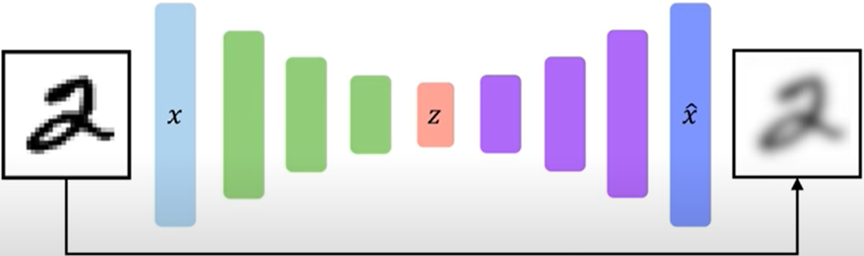

## Data description

- An RNA-seq dataset published in Zeisel et al. (2015), containing 3,005 mouse brain single cells. Cells are grouped into 7 major cell types.
- data
- Zeisel_expression.csv - expression data.
- Zeisel_cell_label.csv - label.


## Clustering

Five evaluation scores:
- Normalized Mutual information: metrics.normalized_mutual_info_score(Y, y_pred_kmeans))
- Homogeneity: metrics.homogeneity_score(Y, y_pred_kmeans))
- Completeness:  metrics.completeness_score(Y, y_pred_kmeans))
- Adjusted Rand Index: metrics.adjusted_rand_score(Y, y_pred_kmeans))
- Silhouette Coefficient: metrics.silhouette_score(x_train_1, Y))

The larger above evaluation scores, the better clustering performance.

## Activation function: Elu

Exponential Linear Unit or its widely known name ELU is a function that tend to converge cost to zero faster and produce more accurate results. Different to other activation functions, ELU has a extra alpha constant which should be positive number.

ELU is very similiar to RELU except negative inputs. They are both in identity function form for non-negative inputs. On the other hand, ELU becomes smooth slowly until its output equal to -α whereas RELU sharply smoothes.

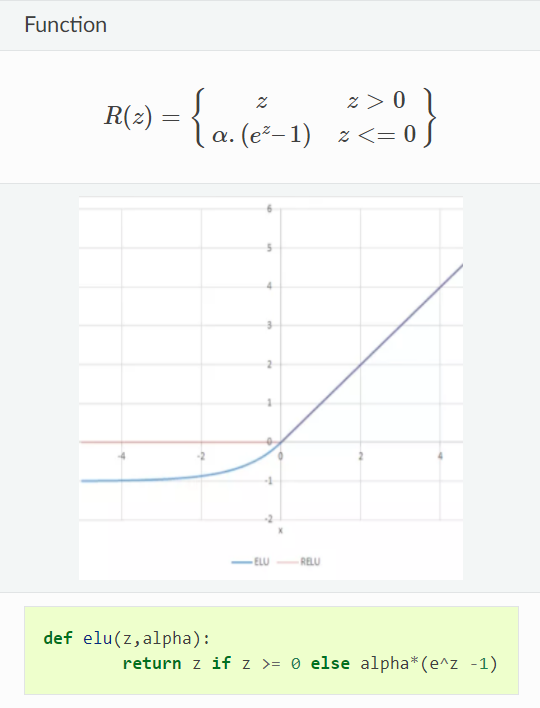

## Import Libraries


In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential, Model
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler

In [2]:
!pwd

/users/PAS1571/wangcankun100/BMI8050-2020_backup


## Prepare Dataset

### Copy datasets from course project directory if not exist

In [3]:
from distutils.dir_util import copy_tree
import os.path
from os import path
if not path.exists('Zeisel_expression.csv'):
    copy_tree("/fs/ess/PAS1791/course_code/autoencoder_example", ".")

### Read Data

In [4]:
expr = pd.read_csv('Zeisel_expression.csv',index_col=0)  #expression matrix
expr=expr.T  #transpose data from gene by cell to cell by gene
y = pd.read_csv('Zeisel_cell_label.csv',index_col=0)  #label 

In [5]:
print(expr.shape)
print(y.shape)
n_clusters = len(np.unique(y))
print(n_clusters)

(3005, 19972)
(3005, 1)
7


In [6]:
expr.head()

Gene_symbol,0610005C13Rik,0610007N19Rik,0610007P14Rik,0610009B22Rik,0610009D07Rik,0610009L18Rik,0610009O20Rik,0610010B08Rik_loc1,0610010B08Rik_loc4,0610010B08Rik_loc6,...,Zwilch,Zwint,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3
1772071015_C02,0,0,3,0,1,0,0,0,0,0,...,0,3,0,0,2,0,2,0,0,0
1772071017_G12,0,0,0,1,4,0,0,0,0,0,...,0,10,0,0,0,0,0,1,0,0
1772071017_A05,0,0,1,3,2,0,1,0,0,0,...,0,3,0,0,0,0,19,0,2,0
1772071014_B06,0,0,0,3,1,0,0,0,0,0,...,0,13,0,0,0,0,13,2,2,1
1772067065_H06,0,0,1,0,2,0,0,0,0,0,...,0,0,0,0,1,0,9,0,1,0


In [7]:
y.head()

,Label
Cell,
1772071015_C02,1
1772071017_G12,1
1772071017_A05,1
1772071014_B06,1
1772067065_H06,1


In [8]:
X = expr.values
X = np.log(X + 1)
#X = X.values
Y = y.values
Y = Y.reshape(Y.shape[0])

# Reducing dimensions

## Methods 1 - PCA

In [9]:
n_input_1 = 2
x_train_1 = PCA(n_components = n_input_1).fit_transform(X)
x_train_1 = MinMaxScaler().fit_transform(x_train_1)
y_train = Y

/users/PAS1571/wangcankun100/.local/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


Normalized Mutual information: 0.4388
Homogeneity: 0.4622
Completeness: 0.4176
Adjusted Rand Index: 0.3030
Silhouette Coefficient: 0.0597


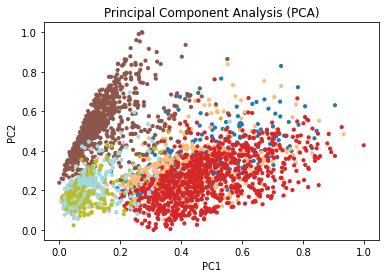

In [10]:
plt.scatter(x_train_1[:, 0], x_train_1[:, 1], c = y_train, cmap = 'tab20', s = 10)
plt.title('Principal Component Analysis (PCA)')
plt.xlabel("PC1")
plt.ylabel("PC2")

# Runs in parallel 4 CPUs
kmeans = KMeans(n_clusters=n_clusters, n_init=20, n_jobs=4)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(x_train_1)

# Evaluate the K-Means clustering accuracy.
print("Normalized Mutual information: %0.4f" % metrics.normalized_mutual_info_score(Y, y_pred_kmeans))
print("Homogeneity: %0.4f" % metrics.homogeneity_score(Y, y_pred_kmeans))
print("Completeness: %0.4f" % metrics.completeness_score(Y, y_pred_kmeans))
print("Adjusted Rand Index: %0.4f" % metrics.adjusted_rand_score(Y, y_pred_kmeans))
print("Silhouette Coefficient: %0.4f" % metrics.silhouette_score(x_train_1, Y))

## Methods 2 - autoencoders

Here we use Autoencoder like the following graph, it's an autoencoder with 8 layers.

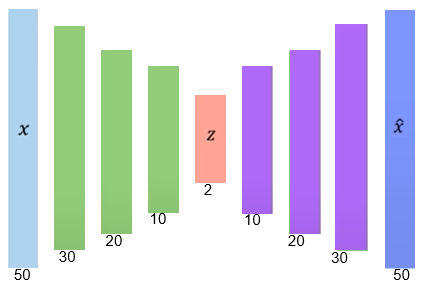

## Build model

In [14]:
# PCA
n_input = 50
x_train = PCA(n_components = n_input).fit_transform(X)
x_train = MinMaxScaler().fit_transform(x_train)
# Autoencoder
model = Sequential()

# Encoder
model.add(Dense(30,       activation='elu', input_shape=(n_input,)))
model.add(Dense(20,       activation='elu'))
model.add(Dense(10,       activation='elu'))

# Bottleneck
model.add(Dense(2,        activation='linear', name="bottleneck"))

# Decoder
model.add(Dense(10,       activation='elu'))
model.add(Dense(20,       activation='elu'))
model.add(Dense(30,       activation='elu'))

# Output layer
model.add(Dense(n_input,  activation='sigmoid'))

# Compile
model.compile(loss = 'mean_squared_error', optimizer = Adam())
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_8 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 22        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_11 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_12 (Dense)             (None, 30)               

## Model training

Epoch 1/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0257 - val_loss: 0.0232
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0144
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.0110
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0115 - val_loss: 0.0114
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0115 - val_loss: 0.0114
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0114 - val_loss: 0.0114
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0114 - val_loss: 0.0114
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0113 - val_loss: 0.0113
Epoch 9/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0112 - val_loss: 0.0113
Epoch 10/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0111 - val_loss: 0.0113
Epoch 11/

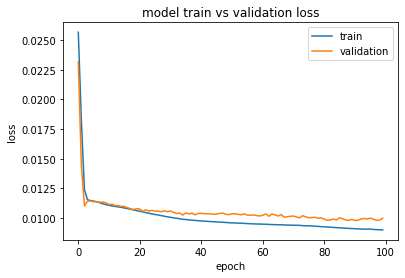

In [16]:

# Fit
history_1 = model.fit(x_train, x_train, epochs=100, batch_size=128, shuffle=True,validation_split=0.1, verbose = 1)

#plot our loss 
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Obtain bottleneck
encoder = Model(model.input, model.get_layer('bottleneck').output)
bottleneck_representation = encoder.predict(x_train)



## Plot results

/users/PAS1571/wangcankun100/.local/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


Normalized Mutual information: 0.5573
Homogeneity: 0.5880
Completeness: 0.5296
Adjusted Rand Index: 0.4287
Silhouette Coefficient: 0.1810


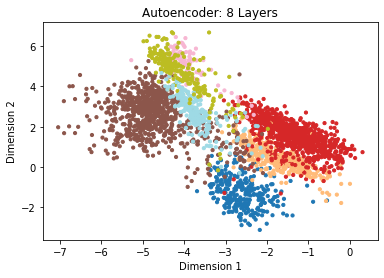

In [17]:
# Plot results
plt.scatter(bottleneck_representation[:,0], bottleneck_representation[:,1], 
            c = Y, s = 10, cmap = 'tab20')
plt.title('Autoencoder: 8 Layers')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Kmeans on autoencoder
# Runs in parallel 4 CPUs
kmeans = KMeans(n_clusters=n_clusters, n_init=20, n_jobs=4)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(bottleneck_representation)
# Evaluate the clustering performance
print("Normalized Mutual information: %0.4f" % metrics.normalized_mutual_info_score(Y, y_pred_kmeans))
print("Homogeneity: %0.4f" % metrics.homogeneity_score(Y, y_pred_kmeans))
print("Completeness: %0.4f" % metrics.completeness_score(Y, y_pred_kmeans))
print("Adjusted Rand Index: %0.4f" % metrics.adjusted_rand_score(Y, y_pred_kmeans))
print("Silhouette Coefficient: %0.4f" % metrics.silhouette_score(bottleneck_representation, Y))

### Result: The performance of above autoencoder better than PCA.

## Several examples of misuse of Autoencoder.

## Q1: Is the neural network more complex the better?  What if we use an autoencoder like this?

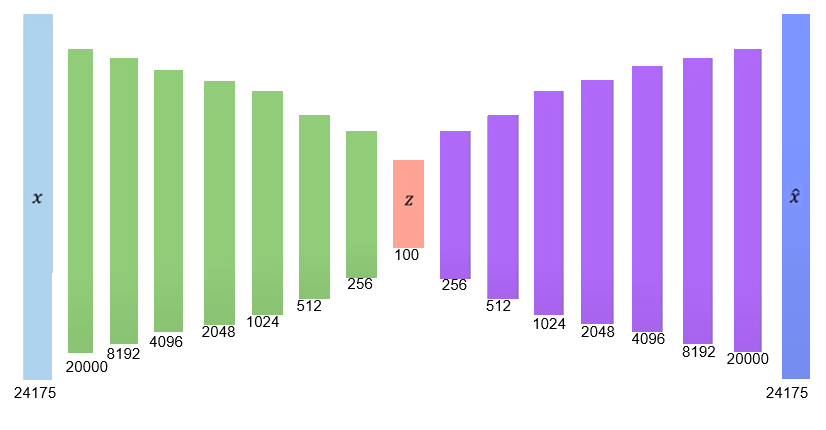

### In fact, I have tried above network, it takes long time and is trained badly, and It even caused the server to shut down a few times ...

### Example 1:  An autoencoder with many layers and nodes
#### 1.1 Reduce neurons in the first few layers, from 19972 to 512, then 128, 64,...

#### There are a lot of neurons, so we set the epoch as 40 here.

In [20]:
# What is our input dimension in training data?
print (X.shape[1])

19972


Epoch 1/40
22/22 [==============================] - 0s 21ms/step - loss: 0.0742 - val_loss: 0.0166
Epoch 2/40
22/22 [==============================] - 0s 15ms/step - loss: 0.0287 - val_loss: 0.0143
Epoch 3/40
22/22 [==============================] - 0s 14ms/step - loss: 0.0268 - val_loss: 0.0140
Epoch 4/40
22/22 [==============================] - 0s 14ms/step - loss: 0.0256 - val_loss: 0.0138
Epoch 5/40
22/22 [==============================] - 0s 14ms/step - loss: 0.0238 - val_loss: 0.0137
Epoch 6/40
22/22 [==============================] - 0s 14ms/step - loss: 0.0195 - val_loss: 0.0129
Epoch 7/40
22/22 [==============================] - 0s 14ms/step - loss: 0.0183 - val_loss: 0.0128
Epoch 8/40
22/22 [==============================] - 0s 14ms/step - loss: 0.0180 - val_loss: 0.0129
Epoch 9/40
22/22 [==============================] - 0s 14ms/step - loss: 0.0179 - val_loss: 0.0130
Epoch 10/40
22/22 [==============================] - 0s 14ms/step - loss: 0.0179 - val_loss: 0.0130
Epoch 11/

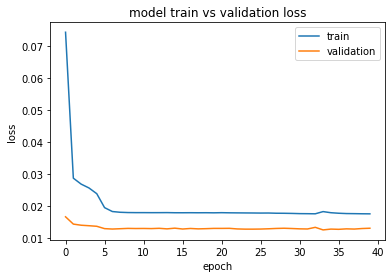

/users/PAS1571/wangcankun100/.local/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


Normalized Mutual information: 0.3710
Homogeneity: 0.3826
Completeness: 0.3602
Adjusted Rand Index: 0.2573
Silhouette Coefficient: -0.0439


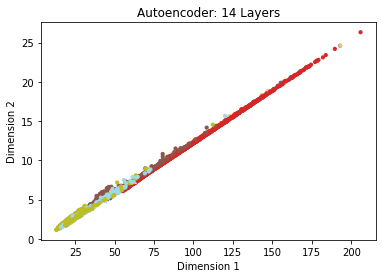

In [21]:
model = Sequential()
X = MinMaxScaler().fit_transform(X)
# Encoder
model.add(Dense(512,       activation='elu', input_shape=(X.shape[1],)))
model.add(Dense(128,       activation='elu'))
model.add(Dense(64,       activation='elu'))
model.add(Dense(16,       activation='elu'))
model.add(Dense(8,       activation='elu'))
model.add(Dense(4,       activation='elu'))

# Bottleneck
model.add(Dense(2,        activation='linear', name="bottleneck"))

# Decoder
model.add(Dense(4,       activation='elu'))
model.add(Dense(8,       activation='elu'))
model.add(Dense(16,       activation='elu'))
model.add(Dense(64,       activation='elu'))
model.add(Dense(128,       activation='elu'))
model.add(Dense(512,       activation='elu'))

# Output layer
model.add(Dense(X.shape[1],  activation='sigmoid'))

# Compile
model.compile(loss = 'mean_squared_error', optimizer = Adam())

# Fit
history_5 = model.fit(X, X, epochs=40, batch_size=128, shuffle=True, validation_split=0.1, verbose = 1)

#plot our loss 
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


# Obtain bottleneck
encoder = Model(model.input, model.get_layer('bottleneck').output)
bottleneck_representation = encoder.predict(X)

# Plot results
plt.scatter(bottleneck_representation[:,0], bottleneck_representation[:,1], 
            c = Y, s = 10, cmap = 'tab20')
plt.title('Autoencoder: 14 Layers')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Kmeans on autoencoder
# Runs in parallel 4 CPUs
kmeans = KMeans(n_clusters=n_clusters, n_init=20, n_jobs=4)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(bottleneck_representation)

# Evaluate the clustering performance
print("Normalized Mutual information: %0.4f" % metrics.normalized_mutual_info_score(Y, y_pred_kmeans))
print("Homogeneity: %0.4f" % metrics.homogeneity_score(Y, y_pred_kmeans))
print("Completeness: %0.4f" % metrics.completeness_score(Y, y_pred_kmeans))
print("Adjusted Rand Index: %0.4f" % metrics.adjusted_rand_score(Y, y_pred_kmeans))
print("Silhouette Coefficient: %0.4f" % metrics.silhouette_score(bottleneck_representation, Y))

#### 1.2 Reduce the number of nodes in the last few layers, from 19972 to 8192, then 2048, 1024,...

#### See the result directly pasted below this model.

In [23]:
model = Sequential()
X = MinMaxScaler().fit_transform(X)
# Encoder
model.add(Dense(8192,       activation='elu', input_shape=(X.shape[1],)))
model.add(Dense(2048,       activation='elu'))
model.add(Dense(1024,       activation='elu'))
model.add(Dense(256,       activation='elu'))
model.add(Dense(64,       activation='elu'))
model.add(Dense(16,       activation='elu'))

# Bottleneck
model.add(Dense(2,        activation='linear', name="bottleneck"))

# Decoder
model.add(Dense(16,       activation='elu'))
model.add(Dense(64,       activation='elu'))
model.add(Dense(256,       activation='elu'))
model.add(Dense(1024,       activation='elu'))
model.add(Dense(2048,       activation='elu'))
model.add(Dense(8192,       activation='elu'))

# Output layer
model.add(Dense(X.shape[1],  activation='sigmoid'))

# Compile
model.compile(loss = 'mean_squared_error', optimizer = Adam())
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 8192)              163618816 
_________________________________________________________________
dense_41 (Dense)             (None, 2048)              16779264  
_________________________________________________________________
dense_42 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_43 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_44 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_45 (Dense)             (None, 16)                1040      
_________________________________________________________________
bottleneck (Dense)           (None, 2)                

### Model training

In [ ]:
# Fit
'''We did not train the model here since it will take about 10 mins'''
#history_5 = model.fit(X, X, epochs=40, batch_size=128, shuffle=True, validation_split=0.1, verbose = 1)


#plot our loss 
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


# Obtain bottleneck
encoder = Model(model.input, model.get_layer('bottleneck').output)
bottleneck_representation = encoder.predict(X)

# Plot results
plt.scatter(bottleneck_representation[:,0], bottleneck_representation[:,1], 
            c = Y, s = 10, cmap = 'tab20')
plt.title('Autoencoder: 14 Layers')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Kmeans on autoencoder
# Runs in parallel 4 CPUs
kmeans = KMeans(n_clusters=n_clusters, n_init=20, n_jobs=4)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(bottleneck_representation)

# Evaluate the clustering performance
print("Normalized Mutual information: %0.4f" % metrics.normalized_mutual_info_score(Y, y_pred_kmeans))
print("Homogeneity: %0.4f" % metrics.homogeneity_score(Y, y_pred_kmeans))
print("Completeness: %0.4f" % metrics.completeness_score(Y, y_pred_kmeans))
print("Adjusted Rand Index: %0.4f" % metrics.adjusted_rand_score(Y, y_pred_kmeans))
print("Silhouette Coefficient: %0.4f" % metrics.silhouette_score(bottleneck_representation, Y))

## Result:

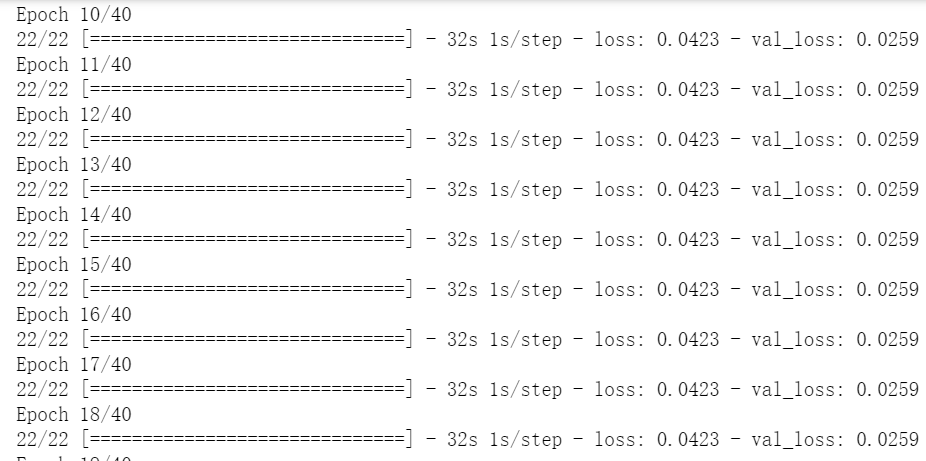
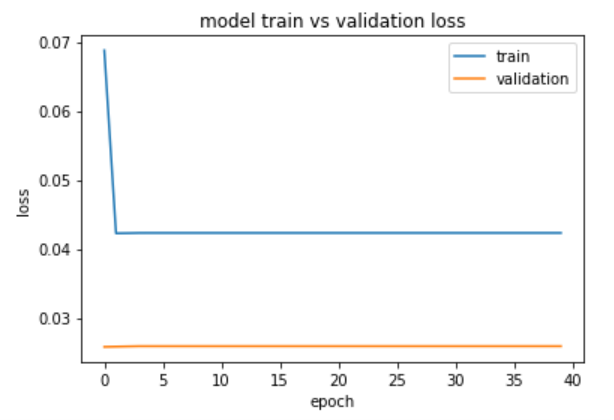
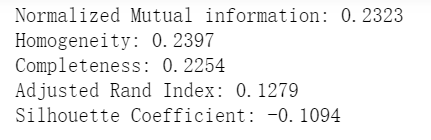
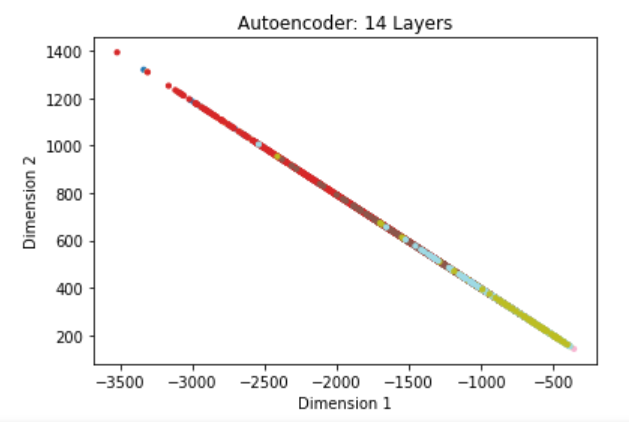

#### Results: 
- The performance of above two models are not good. 
- For the second one, too many neurons result in too many parameters, and networks cannot be trained at all!
#### Conclusion: 
- Neural network we designed shouldn't contain too many nodes.
- In this case, we should start by bringing down the number of neurons in the network.

### Q2: How to run a high-dimensional data using autoencoder?
#### So how should we reduce the nodes appropriatly? Let's try the following two models.

#### Model 1: Using PCA before Autoencoder.

Epoch 1/100
22/22 [==============================] - 0s 11ms/step - loss: 0.0128 - val_loss: 0.0041
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0105 - val_loss: 0.0039
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0104 - val_loss: 0.0039
Epoch 4/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0104 - val_loss: 0.0039
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0104 - val_loss: 0.0039
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0104 - val_loss: 0.0039
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0104 - val_loss: 0.0039
Epoch 8/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0104 - val_loss: 0.0039
Epoch 9/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0104 - val_loss: 0.0039
Epoch 10/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0104 - val_loss: 0.0039
Epoch 11

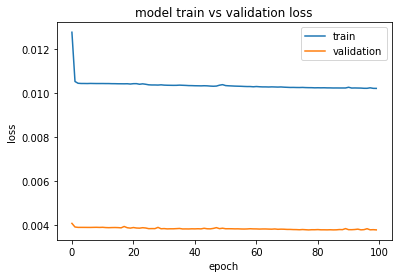

/users/PAS1571/wangcankun100/.local/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


Normalized Mutual information: 0.5250
Homogeneity: 0.5373
Completeness: 0.5133
Adjusted Rand Index: 0.4539
Silhouette Coefficient: 0.1210


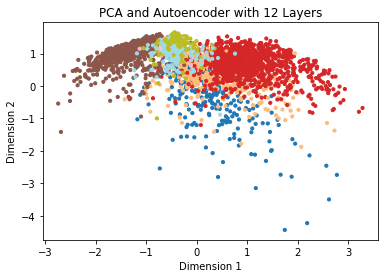

In [28]:
n_input = 512
x_train = PCA(n_components = n_input).fit_transform(X)
x_train = MinMaxScaler().fit_transform(x_train)
model = Sequential()

# Encoder
model.add(Dense(256,       activation='elu', input_shape=(n_input,)))
model.add(Dense(128,       activation='elu'))
model.add(Dense(64,       activation='elu'))
model.add(Dense(32,       activation='elu'))
model.add(Dense(16,       activation='elu'))
# Bottleneck
model.add(Dense(2,        activation='linear', name="bottleneck"))

# Decoder
model.add(Dense(16,       activation='elu'))
model.add(Dense(32,       activation='elu'))
model.add(Dense(64,       activation='elu'))
model.add(Dense(128,       activation='elu'))
model.add(Dense(256,       activation='elu'))

# Output layer
model.add(Dense(n_input,  activation='sigmoid'))

# Compile
model.compile(loss = 'mean_squared_error', optimizer = Adam())

# Fit
history_4 = model.fit(x_train, x_train, epochs=100, batch_size=128, shuffle=True,validation_split=0.1, verbose = 1)

#plot our loss 
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Obtain bottleneck
encoder = Model(model.input, model.get_layer('bottleneck').output)
bottleneck_representation = encoder.predict(x_train)

# Plot results
plt.scatter(bottleneck_representation[:,0], bottleneck_representation[:,1], 
            c = Y, s = 10, cmap = 'tab20')
plt.title('PCA and Autoencoder with 12 Layers')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Kmeans on autoencoder
# Runs in parallel 4 CPUs
kmeans = KMeans(n_clusters=n_clusters, n_init=20, n_jobs=4)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(bottleneck_representation)

# Evaluate the clustering performance
print("Normalized Mutual information: %0.4f" % metrics.normalized_mutual_info_score(Y, y_pred_kmeans))
print("Homogeneity: %0.4f" % metrics.homogeneity_score(Y, y_pred_kmeans))
print("Completeness: %0.4f" % metrics.completeness_score(Y, y_pred_kmeans))
print("Adjusted Rand Index: %0.4f" % metrics.adjusted_rand_score(Y, y_pred_kmeans))
print("Silhouette Coefficient: %0.4f" % metrics.silhouette_score(bottleneck_representation, Y))

#### Model 2:  Using Autoencoder directly without PCA.
#### Too many neurons and the losses didn't change in the second half of the epoches, so wo set epoch from 100 to 40 here.

Epoch 1/40
22/22 [==============================] - 0s 21ms/step - loss: 0.0681 - val_loss: 0.0159
Epoch 2/40
22/22 [==============================] - 1s 25ms/step - loss: 0.0534 - val_loss: 0.0187
Epoch 3/40
22/22 [==============================] - 0s 15ms/step - loss: 0.0283 - val_loss: 0.0165
Epoch 4/40
22/22 [==============================] - 0s 14ms/step - loss: 0.0204 - val_loss: 0.0127
Epoch 5/40
22/22 [==============================] - 0s 14ms/step - loss: 0.0185 - val_loss: 0.0125
Epoch 6/40
22/22 [==============================] - 0s 14ms/step - loss: 0.0183 - val_loss: 0.0125
Epoch 7/40
22/22 [==============================] - 0s 14ms/step - loss: 0.0182 - val_loss: 0.0125
Epoch 8/40
22/22 [==============================] - 0s 15ms/step - loss: 0.0181 - val_loss: 0.0125
Epoch 9/40
22/22 [==============================] - 0s 15ms/step - loss: 0.0181 - val_loss: 0.0127
Epoch 10/40
22/22 [==============================] - 0s 15ms/step - loss: 0.0180 - val_loss: 0.0126
Epoch 11/

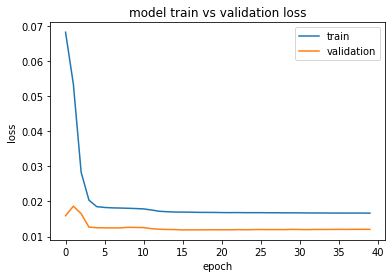

/users/PAS1571/wangcankun100/.local/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


Normalized Mutual information: 0.3855
Homogeneity: 0.4043
Completeness: 0.3684
Adjusted Rand Index: 0.2649
Silhouette Coefficient: -0.0089


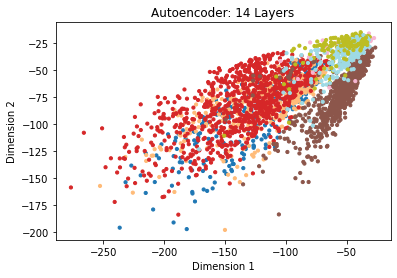

In [30]:
model = Sequential()
X = MinMaxScaler().fit_transform(X)
# Encoder
model.add(Dense(512,       activation='elu', input_shape=(X.shape[1],)))
model.add(Dense(256,       activation='elu'))
model.add(Dense(128,       activation='elu'))
model.add(Dense(64,       activation='elu'))
model.add(Dense(32,       activation='elu'))
model.add(Dense(16,       activation='elu'))

# Bottleneck
model.add(Dense(2,        activation='linear', name="bottleneck"))

# Decoder
model.add(Dense(16,       activation='elu'))
model.add(Dense(32,       activation='elu'))
model.add(Dense(64,       activation='elu'))
model.add(Dense(128,       activation='elu'))
model.add(Dense(256,       activation='elu'))
model.add(Dense(512,       activation='elu'))

# Output layer
model.add(Dense(X.shape[1],  activation='sigmoid'))

# Compile
model.compile(loss = 'mean_squared_error', optimizer = Adam())

# Fit
history_5 = model.fit(X, X, epochs=40, batch_size=128, shuffle=True, validation_split=0.1, verbose = 1)

#plot our loss 
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


# Obtain bottleneck
encoder = Model(model.input, model.get_layer('bottleneck').output)
bottleneck_representation = encoder.predict(X)

# Plot results
plt.scatter(bottleneck_representation[:,0], bottleneck_representation[:,1], 
            c = Y, s = 10, cmap = 'tab20')
plt.title('Autoencoder: 14 Layers')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Kmeans on autoencoder
# Runs in parallel 4 CPUs
kmeans = KMeans(n_clusters=n_clusters, n_init=20, n_jobs=4)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(bottleneck_representation)

# Evaluate the clustering performance
print("Normalized Mutual information: %0.4f" % metrics.normalized_mutual_info_score(Y, y_pred_kmeans))
print("Homogeneity: %0.4f" % metrics.homogeneity_score(Y, y_pred_kmeans))
print("Completeness: %0.4f" % metrics.completeness_score(Y, y_pred_kmeans))
print("Adjusted Rand Index: %0.4f" % metrics.adjusted_rand_score(Y, y_pred_kmeans))
print("Silhouette Coefficient: %0.4f" % metrics.silhouette_score(bottleneck_representation, Y))

#### Results: 
- The performance of above two models are similar.
- The model using PCA before training is faster. 
- The model is overfitting.

#### Conclusion: We can use PCA to reduce the dimension before Autoencoder. 

### Q3: How to fix the problem of overfitting?
### Q4: Should we reduce the number of nodes or layers first?

#### Method 1:  Adding dropout layer (dropout = 0.2).

Epoch 1/40
22/22 [==============================] - 0s 11ms/step - loss: 0.0136 - val_loss: 0.0040
Epoch 2/40
22/22 [==============================] - 0s 6ms/step - loss: 0.0110 - val_loss: 0.0038
Epoch 3/40
22/22 [==============================] - 0s 6ms/step - loss: 0.0105 - val_loss: 0.0038
Epoch 4/40
22/22 [==============================] - 0s 5ms/step - loss: 0.0104 - val_loss: 0.0038
Epoch 5/40
22/22 [==============================] - 0s 6ms/step - loss: 0.0104 - val_loss: 0.0038
Epoch 6/40
22/22 [==============================] - 0s 5ms/step - loss: 0.0104 - val_loss: 0.0038
Epoch 7/40
22/22 [==============================] - 0s 6ms/step - loss: 0.0103 - val_loss: 0.0038
Epoch 8/40
22/22 [==============================] - 0s 5ms/step - loss: 0.0103 - val_loss: 0.0038
Epoch 9/40
22/22 [==============================] - 0s 6ms/step - loss: 0.0103 - val_loss: 0.0038
Epoch 10/40
22/22 [==============================] - 0s 5ms/step - loss: 0.0103 - val_loss: 0.0038
Epoch 11/40
22/22 

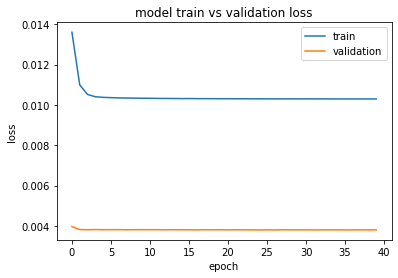

/users/PAS1571/wangcankun100/.local/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


Normalized Mutual information: 0.0514
Homogeneity: 0.0522
Completeness: 0.0506
Adjusted Rand Index: 0.0141
Silhouette Coefficient: -0.1973


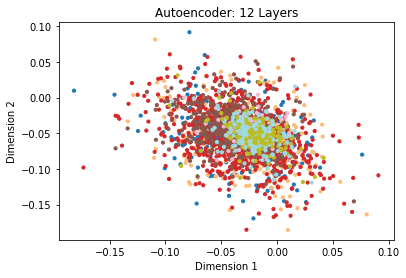

In [32]:
n_input = 512
x_train = PCA(n_components = n_input).fit_transform(X)
x_train = MinMaxScaler().fit_transform(x_train)
model = Sequential()

# Encoder
model.add(Dense(256,       activation='elu', input_shape=(n_input,)))
model.add(Dropout(0.2))
model.add(Dense(128,       activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(64,       activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(32,       activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(16,       activation='elu'))
model.add(Dropout(0.2))
# Bottleneck
model.add(Dense(2,        activation='linear', name="bottleneck"))

# Decoder
model.add(Dense(16,       activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(32,       activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(64,       activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(128,       activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(256,       activation='elu'))

# Output layer
model.add(Dense(n_input,  activation='sigmoid'))

# Compile
model.compile(loss = 'mean_squared_error', optimizer = Adam())

# Fit
history_4 = model.fit(x_train, x_train, epochs=40, batch_size=128, shuffle=True,validation_split=0.1, verbose = 1)

#plot our loss 
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Obtain bottleneck
encoder = Model(model.input, model.get_layer('bottleneck').output)
bottleneck_representation = encoder.predict(x_train)

# Plot results
plt.scatter(bottleneck_representation[:,0], bottleneck_representation[:,1], 
            c = Y, s = 10, cmap = 'tab20')
plt.title('Autoencoder: 12 Layers')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Kmeans on autoencoder
# Runs in parallel 4 CPUs
kmeans = KMeans(n_clusters=n_clusters, n_init=20, n_jobs=4)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(bottleneck_representation)

# Evaluate the clustering performance
print("Normalized Mutual information: %0.4f" % metrics.normalized_mutual_info_score(Y, y_pred_kmeans))
print("Homogeneity: %0.4f" % metrics.homogeneity_score(Y, y_pred_kmeans))
print("Completeness: %0.4f" % metrics.completeness_score(Y, y_pred_kmeans))
print("Adjusted Rand Index: %0.4f" % metrics.adjusted_rand_score(Y, y_pred_kmeans))
print("Silhouette Coefficient: %0.4f" % metrics.silhouette_score(bottleneck_representation, Y))

#### Method 2:  Reduce the number of nodes or layers (from 14 to 8 layers).

Epoch 1/40
22/22 [==============================] - 0s 9ms/step - loss: 0.0128 - val_loss: 0.0042
Epoch 2/40
22/22 [==============================] - 0s 5ms/step - loss: 0.0107 - val_loss: 0.0039
Epoch 3/40
22/22 [==============================] - 0s 5ms/step - loss: 0.0106 - val_loss: 0.0039
Epoch 4/40
22/22 [==============================] - 0s 5ms/step - loss: 0.0106 - val_loss: 0.0039
Epoch 5/40
22/22 [==============================] - 0s 5ms/step - loss: 0.0106 - val_loss: 0.0039
Epoch 6/40
22/22 [==============================] - 0s 5ms/step - loss: 0.0106 - val_loss: 0.0039
Epoch 7/40
22/22 [==============================] - 0s 5ms/step - loss: 0.0106 - val_loss: 0.0039
Epoch 8/40
22/22 [==============================] - 0s 4ms/step - loss: 0.0106 - val_loss: 0.0039
Epoch 9/40
22/22 [==============================] - 0s 4ms/step - loss: 0.0106 - val_loss: 0.0039
Epoch 10/40
22/22 [==============================] - 0s 4ms/step - loss: 0.0106 - val_loss: 0.0039
Epoch 11/40
22/22 [

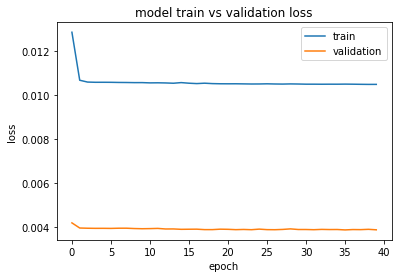

/users/PAS1571/wangcankun100/.local/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


Normalized Mutual information: 0.3404
Homogeneity: 0.3496
Completeness: 0.3316
Adjusted Rand Index: 0.2594
Silhouette Coefficient: -0.0413


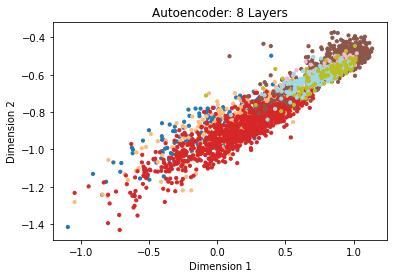

In [33]:
# PCA
n_input = 526
x_train = PCA(n_components = n_input).fit_transform(X)
x_train = MinMaxScaler().fit_transform(x_train)

# Autoencoder
model = Sequential()

# Encoder
model.add(Dense(256,       activation='elu', input_shape=(n_input,)))
model.add(Dense(64,       activation='elu'))
model.add(Dense(32,       activation='elu'))

# Bottleneck
model.add(Dense(2,        activation='linear', name="bottleneck"))

# Decoder
model.add(Dense(32,       activation='elu'))
model.add(Dense(64,       activation='elu'))
model.add(Dense(256,       activation='elu'))

# Output layer
model.add(Dense(n_input,  activation='sigmoid'))

# Compile
model.compile(loss = 'mean_squared_error', optimizer = Adam())

# Fit
history_3 = model.fit(x_train, x_train, epochs=40, batch_size=128, shuffle=True,validation_split=0.1, verbose = 1)

#plot our loss 
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Obtain bottleneck
encoder = Model(model.input, model.get_layer('bottleneck').output)
bottleneck_representation = encoder.predict(x_train)

# Plot results
plt.scatter(bottleneck_representation[:,0], bottleneck_representation[:,1], 
            c = Y, s = 10, cmap = 'tab20')
plt.title('Autoencoder: 8 Layers')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Kmeans on autoencoder
# Runs in parallel 4 CPUs
kmeans = KMeans(n_clusters=n_clusters, n_init=20, n_jobs=4)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(bottleneck_representation)
# Evaluate the clustering performance
print("Normalized Mutual information: %0.4f" % metrics.normalized_mutual_info_score(Y, y_pred_kmeans))
print("Homogeneity: %0.4f" % metrics.homogeneity_score(Y, y_pred_kmeans))
print("Completeness: %0.4f" % metrics.completeness_score(Y, y_pred_kmeans))
print("Adjusted Rand Index: %0.4f" % metrics.adjusted_rand_score(Y, y_pred_kmeans))
print("Silhouette Coefficient: %0.4f" % metrics.silhouette_score(bottleneck_representation, Y))

#### Method 3:  Reducing nodes (nodes from 526 to 40 in the first layer, 12 layers in total).

Epoch 1/200
22/22 [==============================] - 0s 9ms/step - loss: 0.0291 - val_loss: 0.0223
Epoch 2/200
22/22 [==============================] - 0s 5ms/step - loss: 0.0178 - val_loss: 0.0122
Epoch 3/200
22/22 [==============================] - 0s 5ms/step - loss: 0.0108 - val_loss: 0.0086
Epoch 4/200
22/22 [==============================] - 0s 5ms/step - loss: 0.0097 - val_loss: 0.0081
Epoch 5/200
22/22 [==============================] - 0s 5ms/step - loss: 0.0097 - val_loss: 0.0083
Epoch 6/200
22/22 [==============================] - 0s 5ms/step - loss: 0.0096 - val_loss: 0.0082
Epoch 7/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0096 - val_loss: 0.0082
Epoch 8/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0096 - val_loss: 0.0082
Epoch 9/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0096 - val_loss: 0.0081
Epoch 10/200
22/22 [==============================] - 0s 5ms/step - loss: 0.0096 - val_loss: 0.0082
Epoch 11/

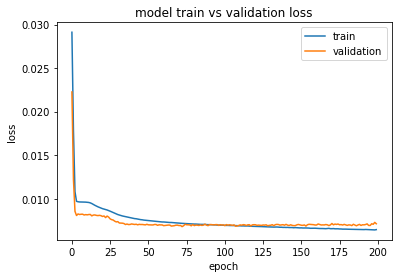

/users/PAS1571/wangcankun100/.local/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


Normalized Mutual information: 0.4587
Homogeneity: 0.4634
Completeness: 0.4541
Adjusted Rand Index: 0.2845
Silhouette Coefficient: -0.0228


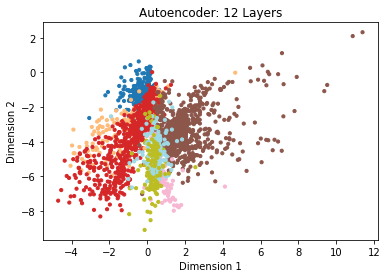

In [34]:
# PCA
n_input = 40
x_train = PCA(n_components = n_input).fit_transform(X)
x_train = MinMaxScaler().fit_transform(x_train)
model = Sequential()

# Encoder
model.add(Dense(30,       activation='elu', input_shape=(n_input,)))
model.add(Dense(20,       activation='elu'))
model.add(Dense(10,       activation='elu'))
model.add(Dense(8,       activation='elu'))
model.add(Dense(4,       activation='elu'))
# Bottleneck
model.add(Dense(2,        activation='linear', name="bottleneck"))

# Decoder
model.add(Dense(4,       activation='elu'))
model.add(Dense(8,       activation='elu'))
model.add(Dense(10,       activation='elu'))
model.add(Dense(20,       activation='elu'))
model.add(Dense(30,       activation='elu'))

# Output layer
model.add(Dense(n_input,  activation='sigmoid'))

# Compile
model.compile(loss = 'mean_squared_error', optimizer = Adam())

# Fit
history_3 = model.fit(x_train, x_train, epochs=200, batch_size=128, shuffle=True,validation_split=0.1, verbose = 1)

#plot our loss 
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Obtain bottleneck
encoder = Model(model.input, model.get_layer('bottleneck').output)
bottleneck_representation = encoder.predict(x_train)

# Plot results
plt.scatter(bottleneck_representation[:,0], bottleneck_representation[:,1], 
            c = Y, s = 10, cmap = 'tab20')
plt.title('Autoencoder: 12 Layers')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Kmeans on autoencoder
# Runs in parallel 4 CPUs
kmeans = KMeans(n_clusters=n_clusters, n_init=20, n_jobs=4)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(bottleneck_representation)
# Evaluate the clustering performance
print("Normalized Mutual information: %0.4f" % metrics.normalized_mutual_info_score(Y, y_pred_kmeans))
print("Homogeneity: %0.4f" % metrics.homogeneity_score(Y, y_pred_kmeans))
print("Completeness: %0.4f" % metrics.completeness_score(Y, y_pred_kmeans))
print("Adjusted Rand Index: %0.4f" % metrics.adjusted_rand_score(Y, y_pred_kmeans))
print("Silhouette Coefficient: %0.4f" % metrics.silhouette_score(bottleneck_representation, Y))

#### Result: 
- Method 1: Adding dropout layer: Doesn't work. -- still too many neurals
- Method 2: Reduce the number of nodes or layers (from 14 to 8 layers):Doesn't work. -- still too many neurals
- Method 3: Reducing nodes (nodes from 526 to 40 in the first layer): Good!

#### Conclusion: 
- We should make the network "thin" and "deep".
- We can try different strategies to solve the problem of overfitting, but first we need to find out the reasons for overfitting.

### Q5: Should we reduce the number of neurons in the first or the last few layers?

#### Method 1. Reduce the number of neurons in the first few layers (64,32,16,8,4,3,2)

Epoch 1/500
22/22 [==============================] - 0s 10ms/step - loss: 0.0256 - val_loss: 0.0201
Epoch 2/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0169 - val_loss: 0.0087
Epoch 3/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0056
Epoch 4/500
22/22 [==============================] - 0s 14ms/step - loss: 0.0078 - val_loss: 0.0057
Epoch 5/500
22/22 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.0057
Epoch 6/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.0057
Epoch 7/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.0058
Epoch 8/500
22/22 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.0057
Epoch 9/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.0057
Epoch 10/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.0057
Epoch 1

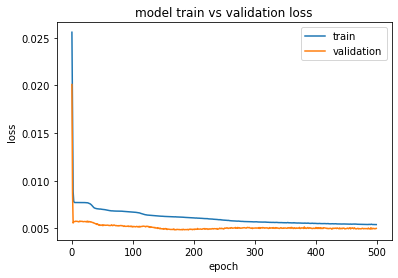

/users/PAS1571/wangcankun100/.local/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


Normalized Mutual information: 0.5405
Homogeneity: 0.5263
Completeness: 0.5555
Adjusted Rand Index: 0.3653
Silhouette Coefficient: 0.1148


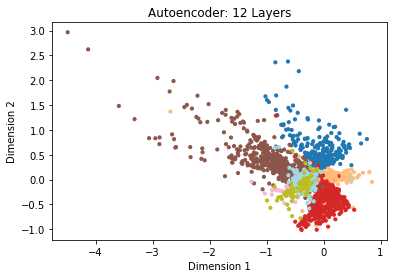

In [35]:
# PCA
n_input = 64
x_train = PCA(n_components = n_input).fit_transform(X)
x_train = MinMaxScaler().fit_transform(x_train)
model = Sequential()

# Encoder
model.add(Dense(32,       activation='elu', input_shape=(n_input,)))
model.add(Dense(16,       activation='elu'))
model.add(Dense(8,       activation='elu'))
model.add(Dense(4,       activation='elu'))
model.add(Dense(3,       activation='elu'))
# Bottleneck
model.add(Dense(2,        activation='linear', name="bottleneck"))

# Decoder
model.add(Dense(3,       activation='elu'))
model.add(Dense(4,       activation='elu'))
model.add(Dense(8,       activation='elu'))
model.add(Dense(16,       activation='elu'))
model.add(Dense(32,       activation='elu'))

# Output layer
model.add(Dense(n_input,  activation='sigmoid'))

# Compile
model.compile(loss = 'mean_squared_error', optimizer = Adam())

# Fit
history_3 = model.fit(x_train, x_train, epochs=500, batch_size=128, shuffle=True,validation_split=0.1, verbose = 1)

#plot our loss 
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Obtain bottleneck
encoder = Model(model.input, model.get_layer('bottleneck').output)
bottleneck_representation = encoder.predict(x_train)

# Plot results
plt.scatter(bottleneck_representation[:,0], bottleneck_representation[:,1], 
            c = Y, s = 10, cmap = 'tab20')
plt.title('Autoencoder: 12 Layers')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Kmeans on autoencoder
# Runs in parallel 4 CPUs
kmeans = KMeans(n_clusters=n_clusters, n_init=20, n_jobs=4)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(bottleneck_representation)
# Evaluate the clustering performance
print("Normalized Mutual information: %0.4f" % metrics.normalized_mutual_info_score(Y, y_pred_kmeans))
print("Homogeneity: %0.4f" % metrics.homogeneity_score(Y, y_pred_kmeans))
print("Completeness: %0.4f" % metrics.completeness_score(Y, y_pred_kmeans))
print("Adjusted Rand Index: %0.4f" % metrics.adjusted_rand_score(Y, y_pred_kmeans))
print("Silhouette Coefficient: %0.4f" % metrics.silhouette_score(bottleneck_representation, Y))

#### Method 2: Reduce the number of neurons in the last few layers.

Epoch 1/500
22/22 [==============================] - 0s 7ms/step - loss: 0.0169 - val_loss: 0.0066
Epoch 2/500
22/22 [==============================] - 0s 5ms/step - loss: 0.0082 - val_loss: 0.0061
Epoch 3/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0078 - val_loss: 0.0057
Epoch 4/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0078 - val_loss: 0.0058
Epoch 5/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.0058
Epoch 6/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.0056
Epoch 7/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0076 - val_loss: 0.0057
Epoch 8/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0075 - val_loss: 0.0055
Epoch 9/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0074 - val_loss: 0.0055
Epoch 10/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0074 - val_loss: 0.0054
Epoch 11/

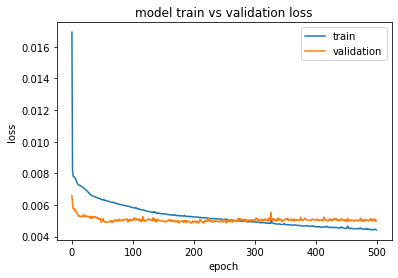

/users/PAS1571/wangcankun100/.local/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


Normalized Mutual information: 0.6029
Homogeneity: 0.6076
Completeness: 0.5983
Adjusted Rand Index: 0.5749
Silhouette Coefficient: 0.0541


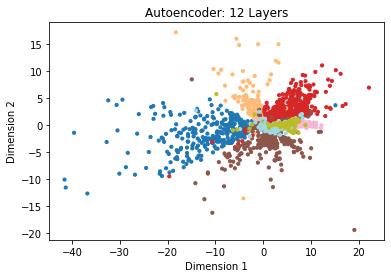

In [36]:
# PCA
n_input = 64
x_train = PCA(n_components = n_input).fit_transform(X)
x_train = MinMaxScaler().fit_transform(x_train)
model = Sequential()

# Encoder
model.add(Dense(60,       activation='elu', input_shape=(n_input,)))
model.add(Dense(50,       activation='elu'))
model.add(Dense(40,       activation='elu'))
model.add(Dense(30,       activation='elu'))
model.add(Dense(10,       activation='elu'))
# Bottleneck
model.add(Dense(2,        activation='linear', name="bottleneck"))

# Decoder
model.add(Dense(10,       activation='elu'))
model.add(Dense(30,       activation='elu'))
model.add(Dense(40,       activation='elu'))
model.add(Dense(50,       activation='elu'))
model.add(Dense(60,       activation='elu'))

# Output layer
model.add(Dense(n_input,  activation='sigmoid'))

# Compile
model.compile(loss = 'mean_squared_error', optimizer = Adam())

# Fit
history_3 = model.fit(x_train, x_train, epochs=500, batch_size=128, shuffle=True,validation_split=0.1, verbose = 1)

#plot our loss 
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Obtain bottleneck
encoder = Model(model.input, model.get_layer('bottleneck').output)
bottleneck_representation = encoder.predict(x_train)

# Plot results
plt.scatter(bottleneck_representation[:,0], bottleneck_representation[:,1], 
            c = Y, s = 10, cmap = 'tab20')
plt.title('Autoencoder: 12 Layers')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Kmeans on autoencoder
# Runs in parallel 4 CPUs
kmeans = KMeans(n_clusters=n_clusters, n_init=20, n_jobs=4)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(bottleneck_representation)
# Evaluate the clustering performance
print("Normalized Mutual information: %0.4f" % metrics.normalized_mutual_info_score(Y, y_pred_kmeans))
print("Homogeneity: %0.4f" % metrics.homogeneity_score(Y, y_pred_kmeans))
print("Completeness: %0.4f" % metrics.completeness_score(Y, y_pred_kmeans))
print("Adjusted Rand Index: %0.4f" % metrics.adjusted_rand_score(Y, y_pred_kmeans))
print("Silhouette Coefficient: %0.4f" % metrics.silhouette_score(bottleneck_representation, Y))

#### Result: 
- The performance of model 1 reducing the number of neurons in the first few layers is better.
- Model 2 reducing the number of neurons in the last few layers is underfitting.

#### Conclusion: 
- In this case, we should reduce the number of neurons in the first few layers!
- Reducing the number of neurons in the first few layers makes the process of training more smoother and stable.

## The deeper, the better?

### An autoencoder with 26 layers.
#### 'he_uniform' definition: Draws samples from a uniform distribution within [-limit, limit], where limit = sqrt(6 / fan_in) (fan_in is the number of input units in the weight tensor).

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_176 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_177 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_178 (Dense)            (None, 14)                238       
_________________________________________________________________
dense_179 (Dense)            (None, 12)                180       
_________________________________________________________________
dense_180 (Dense)            (None, 10)                130       
_________________________________________________________________
dense_181 (Dense)            (None, 9)                 99        
_________________________________________________________________
dense_182 (Dense)            (None, 8)               

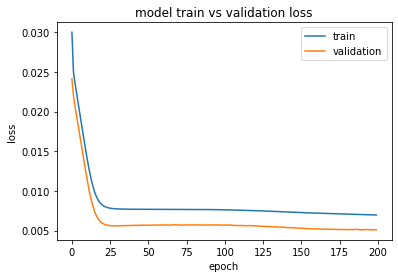

/users/PAS1571/wangcankun100/.local/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


Normalized Mutual information: 0.2077
Homogeneity: 0.2195
Completeness: 0.1971
Adjusted Rand Index: 0.1117
Silhouette Coefficient: -0.0793


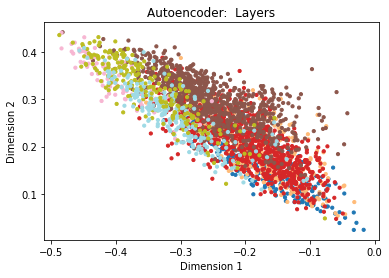

In [37]:
## PCA
n_input = 64
x_train = PCA(n_components = n_input).fit_transform(X)
x_train = MinMaxScaler().fit_transform(x_train)

model = Sequential()
model.add(Dense(32,      activation='elu',     kernel_initializer='he_uniform', 
                input_shape=(n_input,)))
model.add(Dense(16,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(14,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(12,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(10,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(9,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(8,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(7,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(6,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(5,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(4,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(3,       activation='elu',  kernel_initializer='he_uniform'))
model.add(Dense(2,       activation='linear',  kernel_initializer='he_uniform', 
                name="bottleneck"))
model.add(Dense(3,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(4,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(5,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(6,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(7,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(8,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(9,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(10,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(12,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(14,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(16,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(32,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(n_input, activation='sigmoid'))
model.compile(loss = 'mean_squared_error', optimizer = Adam(lr = 0.0001))
model.summary()

history_3 = model.fit(x_train, x_train, epochs=200, batch_size=128, shuffle=True,validation_split=0.1, verbose = 1)

#plot our loss 
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Obtain bottleneck
encoder = Model(model.input, model.get_layer('bottleneck').output)
bottleneck_representation = encoder.predict(x_train)

# Plot results
plt.scatter(bottleneck_representation[:,0], bottleneck_representation[:,1], 
            c = Y, s = 10, cmap = 'tab20')
plt.title('Autoencoder:  Layers')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Kmeans on autoencoder
# Runs in parallel 4 CPUs
kmeans = KMeans(n_clusters=n_clusters, n_init=20, n_jobs=4)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(bottleneck_representation)
# Evaluate the clustering performance
print("Normalized Mutual information: %0.4f" % metrics.normalized_mutual_info_score(Y, y_pred_kmeans))
print("Homogeneity: %0.4f" % metrics.homogeneity_score(Y, y_pred_kmeans))
print("Completeness: %0.4f" % metrics.completeness_score(Y, y_pred_kmeans))
print("Adjusted Rand Index: %0.4f" % metrics.adjusted_rand_score(Y, y_pred_kmeans))
print("Silhouette Coefficient: %0.4f" % metrics.silhouette_score(bottleneck_representation, Y))

[t-SNE] Computing 271 nearest neighbors...
[t-SNE] Indexed 3005 samples in 0.003s...
[t-SNE] Computed neighbors for 3005 samples in 0.139s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3005
[t-SNE] Computed conditional probabilities for sample 2000 / 3005
[t-SNE] Computed conditional probabilities for sample 3000 / 3005
[t-SNE] Computed conditional probabilities for sample 3005 / 3005
[t-SNE] Mean sigma: 0.010719
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.815464
[t-SNE] KL divergence after 1000 iterations: 0.224276


Text(0, 0.5, 'tSNE2')

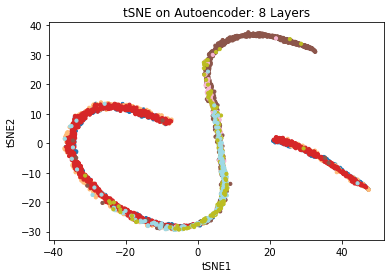

In [40]:
model_tsne_auto = TSNE(learning_rate = 200, n_components = 2, random_state = 123, 
                       perplexity = 90, n_iter = 1000, verbose = 1)
tsne_auto = model_tsne_auto.fit_transform(bottleneck_representation)
plt.scatter(tsne_auto[:, 0], tsne_auto[:, 1], c = Y, cmap = 'tab20', s = 10)
plt.title('tSNE on Autoencoder: 8 Layers')
plt.xlabel("tSNE1")
plt.ylabel("tSNE2")